In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data_ = pd.read_csv("./results/som/propagated_mut.csv" )
data = np.array(data_.drop('patient_id',axis=1))

In [4]:
data_.patient_id = data_.patient_id.str.replace("-01","")

Reducing to 2D dimensions


In [5]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df

array([[-2.37015632,  4.89547957],
       [-1.37078204, -3.18726338],
       [ 1.38723078,  3.66740169],
       ...,
       [-4.65255885,  2.34220443],
       [-1.25307077, -2.60339155],
       [-6.54611029, -9.62465061]])

In [6]:
# #Initialize the class object
kmeans_pca = KMeans(n_clusters= 5)
#predict the labels of clusters.
label_pca = kmeans_pca.fit_predict(df)
 
print(label_pca)

[4 0 1 ... 4 0 0]


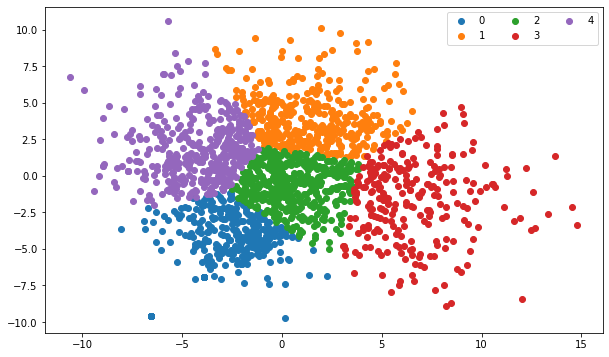

In [7]:
#Getting unique labels
 
u_labels = np.unique(label_pca)
 
#plotting the results:
plt.figure(figsize=(10,6))
for i in u_labels:
    plt.scatter(df[label_pca == i, 0] , df[label_pca == i , 1] , label = i)
plt.legend(ncol = 3)
plt.show()

In [8]:
# #Initialize the class object
kmeans = KMeans(n_clusters= 5)
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
silhouette_score(data, kmeans.labels_)

0.042419281708226036

In [11]:
cluster_assignments = pd.DataFrame({"patient_id": data_.patient_id, "cluster": kmeans.labels_}).sort_values(by = "patient_id")

In [13]:
cluster_assignments.to_csv("./results/kmeans/kmeans_stratified_cluster_assignments.csv")